> A machine learning model using `predictive` or `regression` approach to messure or classify the effects of loadshedding on univesity student's accademic progress.

___


**Task**: `Predictive Model on The Effects of Loadshedding on Accademic Performance of Univesity Students.`

**Date**: `2023-10-23`

**Decription**: `In this notebook I'm going to create a classification or predictive model using different machine learning algorithims that predict the accademic performence on univesity students.`

**Main**: `ML Algorithims`

**Programming Language**: `Python`

___


### Data

In this notebook we are going to load the data from our local file. We have an `csv` spreadsheed that is located in the `data` directory. The folder structure looks as follows:

```shell
📁 /
    📁 data
       - loadshedding_effects_on_academic_performance.xlsx
       - loadshedding_effects_on_academic_performance.csv
```

> Note that the file that we are loading data from is an `csv` file with a base name of `loadshedding_effects_on_academic_performance.csv`



### Imports

The next thing is to import all the packages that we are going to need in this notebook. These are the major packages that we are going to need in to perform this machine learning task.


1. [`pandas`](https://pandas.pydata.org/) - We are going to use this package to read our data into dataframes.
2. [`matplotlib`](https://matplotlib.org/) - We are going to use this package for visualization.
3. [`sklearn`](https://scikit-learn.org/stable/) - scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support-vector machines.
4. [`numpy`](https://numpy.org/) - NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.


> 🎊 Now let's get started by importing the packages that we are going to need here.

In [67]:
import numpy as np 
import pandas as pd

import os
import time
import random
import itertools

from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

print("pandas:", pd.__version__)
print("numpy:", np.__version__)

ModuleNotFoundError: No module named 'prettytable'

### SEED
Setting the seed for all random operations for reproducivity.

> Reproducivity meaning that when runing this notebook multiple times we are going to get same results.

In [2]:
SEED = 23
random.seed(SEED)
np.random.seed(SEED)

### Data

In the following code cell we are going to define the path to where our `data` is located. We are going to load the data first before we clean and work with it in any way. Our data is in an `csv` file and we are going to load it into a pandas dataframe using a method called `read_csv()`. First things first let's define the paths to our data file.

In [3]:
BASE_DIR = './'
DATA_PATH = os.path.join(BASE_DIR, 'data/', 'loadshedding_effects_on_academic_performance.csv')

assert os.path.exists(DATA_PATH), f"The path '{DATA_PATH}' does not exists."

Now that we have a path to our file we are going to load the data of the file in a pandas [`DataFrame`](https://pandas.pydata.org/docs/reference/frame.html) using the [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) method.

In [4]:
dataframe = pd.read_csv(DATA_PATH)

The `dataframe` object has some usefull methods that we can use on it. For example we can check the first 5 rows of our data using the `head(n)` or the last 5 rows of data using the `tail(n)` method. Let's check the last rows of our data.

In [5]:
dataframe.tail().reset_index(drop=True)

,Institution,Year of Study,GPA,Loadshedding Frequency,Loadshedding Duration,Loadshedding Impact,Student ID
0,University of Cape Town,2,2.261930,0,20.553965,None,15224
1,Stellenbosch University,4,1.789417,4,8.499748,None,78007
2,University of Johannesburg,4,3.235504,1,15.075249,Moderate,30101
3,University of KwaZulu-Natal,3,3.691792,2,4.200950,Moderate,84843
4,University of Pretoria,4,2.787871,3,18.108455,Moderate,19206


> You can see that our data is just `raw` data which we need to process. In this task our goal is to predict the loadshedding impact to students styding at different univesities in `South Africa`. So we have some variables that we need to analyse before we create our model. Does they have an impact on student results at the end of the day using common sense.


So what we need to do is to check the `dependent` and `independent` variables that have the impact on students outcome at the end of the day.

1. `Studend ID` - this variable does not affect the student outcome relative to loadshedding occurance.
2. `Institution` - this might have an impact on student outcome relative to loadshedding occurance.
3. `Year of Study` - this also have an impact on students results relative to loadshedding occurance.
4. `GPA` - **Grade Point Average**, is a number that indicates how high you scored in your courses on average. It has an impact on the students yield relative to the loadshedding occurance 
5. `Loadshedding Frequency` - This measures how frequent loadshedding occurs & have a negative or positive impact on student results.
6. `Loadshedding Duration` - This messures how long the loadshedding occurs and it has a great impact on student results.

> All the variables that have impact or that affects the student outcome either positively or negatively must be considered when building our classification model. So we are going to drop the `Studend ID` column.

In [6]:
dataframe.drop(columns=['Student ID'], inplace=True)
dataframe.head()

,Institution,Year of Study,GPA,Loadshedding Frequency,Loadshedding Duration,Loadshedding Impact
0,University of Cape Town,4,2.137368,6,6.304662,None
1,Stellenbosch University,2,3.911333,5,0.489955,Moderate
2,University of Johannesburg,4,3.092123,1,2.462164,Moderate
3,University of KwaZulu-Natal,1,0.000000,4,7.756866,Severe
4,University of Pretoria,1,2.136559,3,0.085806,None


The first thing that we should do when working with data for machine leaning is to check for `null` and `na` values using `isna()` method and `isnull()` so that we drop all those rows where the column value does not have anything in it. Let's check if we have `na` values using the `isna` method.

In [7]:
dataframe.isna().any()

Institution               False
Year of Study             False
GPA                       False
Loadshedding Frequency    False
Loadshedding Duration     False
Loadshedding Impact       False
dtype: bool

> We can be able to see that all colums does not have `na` values. If there were `na`, in that case we use the `dropna()` function on our dataframe so that we drop those columns as they might affect our machine learning algorithms/model.

In [8]:
dataframe.dropna(inplace=True)

The same applies when checking if we have `null` values.

In [9]:
dataframe.isnull().any()

Institution               False
Year of Study             False
GPA                       False
Loadshedding Frequency    False
Loadshedding Duration     False
Loadshedding Impact       False
dtype: bool

### Categorical Labels

Let's have a look at the `unique` impacts of loadshedding which is our `labels` that we are trying to predict.

In [10]:
impacts = dataframe['Loadshedding Impact'].unique()
impacts

array(['None', 'Moderate', 'Severe'], dtype=object)

> Which means we are going to create a muilti-class classification model that will be able to predict the impact of loadsheding amoung these 3 impacts `None`, `Moderate` and `Severe`.


Let's have a look at the `unique` instutions that we have in our dataset. Which instutions participated in this survey.

In [11]:
institutions = dataframe['Institution'].unique()
institutions

array(['University of Cape Town', 'Stellenbosch University',
       'University of Johannesburg', 'University of KwaZulu-Natal',
       'University of Pretoria'], dtype=object)

#### Visulization

In this section of the notebook we are going to analyse the data that we have using visuals. Meaning using `bar` graphs and `pie` charts. 

1. **Impacts**

First of all we need to get the frequency of each impact. So that we can visualise these these frequency using a `pie` chat. 

In [12]:
impact_freq = {i: 0 for i in impacts}
for v in dataframe['Loadshedding Impact'].values:
    impact_freq[v] += 1
    
impact_freq

{'None': 6737, 'Moderate': 6214, 'Severe': 7049}

> We can see that the dataset is not balanced. We have `6737` features taht belongs to the `None` labels, `6214` features that belongs to the `Moderate` label and `7049`  that belongs to the `Severe`.

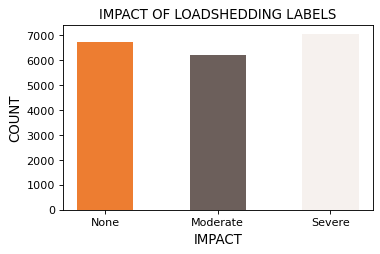

In [13]:
xs = impact_freq.keys()
plt.figure(figsize=(5, 3), dpi=80)
plt.bar(xs, impact_freq.values(), label= xs, width=.5,
        color=['#ED7D31', '#6C5F5B', '#F6F1EE', '#4F4A45'], 
        align="center"
)
plt.title("IMPACT OF LOADSHEDDING LABELS", color="k", fontsize=12)
plt.xlabel("IMPACT", fontsize=12)
plt.ylabel("COUNT", fontsize=12)
plt.show()

We can see how these labels are distributed using the `pie` chat let's have a look at that.

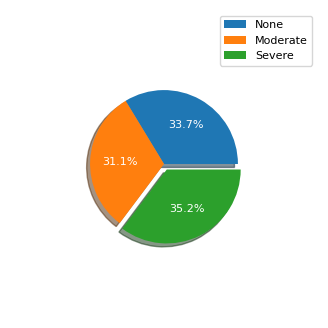

In [14]:
plt.figure(figsize=(4, 4))
plt.pie(impact_freq.values(), explode= [.0, .0, .05], labels=impact_freq.keys(),
        pctdistance=0.6, shadow=True, autopct='%1.1f%%', textprops={'color': 'white', 'fontsize':8}, radius=.6)
plt.legend(fontsize=8)
plt.show()


> Our features and labels distributions are distributed as follows:

1. **`None (~34%)`**
2. **`Moderate (~31%)`**
3. **`Severe (~35%)`**

2. **Students per Institution**

We also need to have a look at how many students took were under the study per each instution and visulize using a `pie` chat.

In [15]:
stud_freq = {i: 0 for i in institutions}
for v in dataframe['Institution'].values:
    stud_freq[v] += 1
stud_freq

{'University of Cape Town': 4000,
 'Stellenbosch University': 4000,
 'University of Johannesburg': 4000,
 'University of KwaZulu-Natal': 4000,
 'University of Pretoria': 4000}

> We have `4 000` students from each institution.

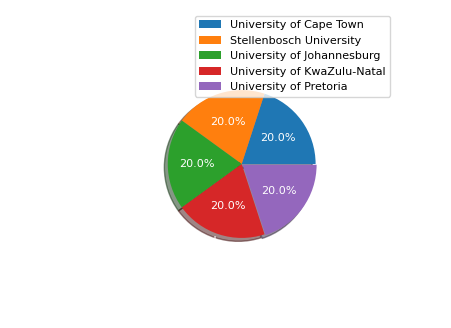

In [16]:
plt.figure(figsize=(4, 4))
plt.pie(stud_freq.values(), explode= [.0, .0, .0, .0, .01], labels=stud_freq.keys(),
        pctdistance=0.6, shadow=True, autopct='%1.1f%%', textprops={'color': 'white', 'fontsize':8}, radius=.6)
plt.legend(fontsize=8)
plt.show()

> From the count plot we can see that the data is **balanced**, which means when evaluating our model using the classification accuracy we can get reasonable results. However we are also going to measure our model performance with other metrics that give us better insights such as:

1. Confusion Matrix
2. Precision
3. Recall
5. F1 Score


### Model Selection and Building
In this section we are going to have a look on how we can build a model that will do the classification of loadshedding imapcts given some certain variables. We are going to:

1. Spliting the sets (train and test)
2. Extract features and labels
3. Scales the features
4. Model Selection
5. Hyper Params Tuning


### Spliting the sets
First thing first we need to split our data into two sets:

1. `train`
2. `test`

For that we are going to take a faction of `20%` of the whole dataset and give it to the `test` data. I will specify the `random_state` to be the `SEED` for reproducivity on the spliting of these sets. We are going to use a method from `mode_selection` called `train_test_split`




In [17]:
train, test = train_test_split(
    dataframe, test_size=0.2, random_state=SEED
)

Now we can visualize using bar graph how many examples do we have in each `set`. 

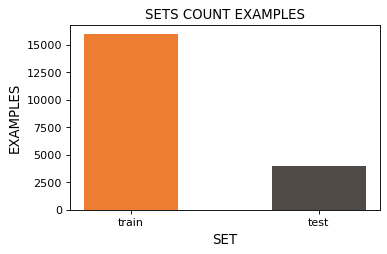

In [18]:
xs = np.array(['train', 'test'])
plt.figure(figsize=(5, 3), dpi=80)
plt.bar(xs, [len(train), len(test)], label=xs, width=.5,
        color=['#ED7D31', '#4F4A45'], 
        align="center"
)
plt.title("SETS COUNT EXAMPLES", color="k", fontsize=12)
plt.xlabel("SET", fontsize=12)
plt.ylabel("EXAMPLES", fontsize=12)
plt.show()

### Why are we splitting sets?
We are splitting our data into two sets which are the train and evaluation set. The reason we are spliting our data into train and test is that we want to train a model using the training data and evaluate the model using the data it haven't seen during it's train which is the test set. So during the training of the model, the model should not have any idea of how our test data so that during evaluation our model will be able to give us reliable matrics. And if we are happy with the metrics which means we have a good chance that the model will perform very well during inference/in production.


### Extract features and labels.

Next we are going to get the train features and labels as well as the test features and labels. After that we are going to encode the labels using the `LabelEncoder`


In [19]:
train_features = train.drop(["Loadshedding Impact"],axis=1)
train_labels = train["Loadshedding Impact"].values

test_features = test.drop(["Loadshedding Impact"],axis=1)
test_labels = test["Loadshedding Impact"].values

Next we are going to `fit` our train labels to the `label` encoder.

In [20]:
label_encoder = LabelEncoder()
label_encoder.fit(train_labels)

LabelEncoder()

Finally we are going to transform our labels to numerical values using the `transform` method.

In [21]:
train_labels_transformed = label_encoder.transform(train_labels)
test_labels_transformed = label_encoder.transform(test_labels)

In [22]:
test_labels_transformed[:5]

array([2, 1, 2, 2, 2])


### Scaling  features

Our feature `Instution` is textual data. We need to encode this column to become numerical values and then scale them using the `OrdinalEncoder`. So we are going to create a pipeline that will work on tranforming our data in the way that we want. We are going to use something called [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) from `sklearn`. We are going to encode each column surperately. Here are the transformations that we are going to make for our featues and labels.

1. Institution	- [`OrdinalEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) -> [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
2. Year of Study -  [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
3. GPA	-[`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
4. Loadshedding Frequency - [`MinMaxScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)	
5. Loadshedding Duration [`MinMaxScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)	
6. Loadshedding Impact - [`LabelEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

These transformers are going to be applied on our `dataframe`. 

> When calling the `fit` method on the column transformer we are going to use the `train` data.

In [23]:
inst_pipe = Pipeline([
  ('ordinal_encoder', OrdinalEncoder()),
  ('standard_scaler', StandardScaler())
])
ct = ColumnTransformer(
    [
        ("instution_process", inst_pipe, ["Institution"]),
        ('standard_scaler',StandardScaler(), ["Year of Study", 'GPA']),
        ("min_max_scaler", MinMaxScaler(), ["Loadshedding Frequency", "Loadshedding Duration"]),
    ]
)
train_features_transformed = ct.fit_transform(train_features)

# on the test data we are only going to transform it
test_features_transformed = ct.transform(test_features)

In [24]:
test_features_transformed.shape, train_features_transformed.shape

((4000, 5), (16000, 5))

> We can see that we have `5` features for both our train and test data. The next thing that we are going to have a look at is `model_selection`.

### Model Selection

In this section we are going to search amoung all the classification algorithim to see which one will perform better for our task. The classification algorithms that we are going to try are:

1. [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
3. [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
4. [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)


In [25]:
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=SEED, max_iter=100))])
pipeline_dt = Pipeline([ ('dt_classifier', DecisionTreeClassifier(random_state=SEED))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_svc = Pipeline([('sv_classifier', SVC())])

pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}

for pipe in pipelines:
    pipe.fit(train_features_transformed, train_labels_transformed)

> Next we are going to calculate the `cross_validation_score` among our classification models and see which classification algorithm does perform better based on our data. 

In [26]:
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model,test_features_transformed, test_labels_transformed, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.994750 
Decision Tree: 0.994000 
RandomForest: 0.995750 
SVC: 0.988000 


 As we can see the `RandomForestClassifier` does best amongst the models with the `cv_score` of `~100%`. Let us build a better `Random Forest` by seraching for the best parameters using the [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Let's find out how it performs on `test` set

In [27]:
parameters = { 
    'n_estimators': [100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4, 6, 8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
CV_rfc.fit(train_features_transformed, train_labels_transformed)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 150}

Now let's create a best classifier using the `RandomForestClassifier` with the best parameters obtained from `grid_search`.

In [28]:
model = RandomForestClassifier(**CV_rfc.best_params_)
model.fit(train_features_transformed, train_labels_transformed)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=150)

### Evaluating model

Next we are going to evaluate our model.

In [29]:
model.score(train_features_transformed, train_labels_transformed)

0.9999375

> Our model was able to get a reasonale accuracy of `99.999%` on the `train_dataset` 

In [30]:
model.score(test_features_transformed, test_labels_transformed)

0.9975

> Our model was able to get a reasonale accuracy of `99.999%` on the `test_dataset` 

### Classifier Performance
In this section we are going to have a look on how well our classifier model will be performing interms of the following metrics.

1. Confusion Matrix
2. Precision
3. Recall
4. F1 Score


### F1 Score
* F1 score is a machine learning evaluation metric that measures a model's accuracy. It combines the precision and recall scores of a model. The accuracy metric computes how many times a model made a correct prediction across the entire dataset.

First let's make predictions for all our 2 sets, train and test.

In [33]:
# predicted labels
train_preds = model.predict(train_features_transformed)
test_preds = model.predict(test_features_transformed)

# real labels
y_train = train_labels_transformed
y_test = test_labels_transformed

We can check the first `10` predicted labels as follows.

In [34]:
train_preds[:10]

array([0, 1, 2, 1, 0, 0, 0, 1, 2, 2])

We can also check the first `10` real labels from the train set as follows:

In [35]:
y_train[:10]

array([0, 1, 2, 1, 0, 0, 0, 1, 2, 2])

Now we can calculate the `f1_scores` for each label in from the `train` set as follows:

In [42]:
score = f1_score(y_train, train_preds, labels=np.array([0, 1, 2 ]), average=None)
score

array([1.        , 0.99990707, 0.99991167])

In [43]:
label_encoder.classes_

array(['Moderate', 'None', 'Severe'], dtype=object)

From the above scores shows us that the model is able to predict the labels with the following accuracies per each label(loadsheding impact)

* `0 (Moderate) - ~100%`
* `1 (None) - ~99.999%`
* `2 (Severe)- ~99.999%`

In the `train` data.

Next we are going to calculate the `f1_scores` for each label in from the `test` set as follows:

In [46]:
score = f1_score(y_test, test_preds, labels=np.array([0, 1, 2 ]), average=None)
score

array([0.99800717, 0.99632082, 0.9981969 ])

From the above scores shows us that the model is able to predict the labels with the following accuracies per each label(loadsheding impact).

* `0 (Moderate) - ~99.8%`
* `1 (None) - ~99.6%`
* `2 (Severe)- ~99.8%`

In the `test` data.

### Confusion Matrix

Next we are going to plot the confusion matrix and visually see how well our model is performing in predicting load shedding impact given some features and how confused it is between these different classes. First i'm going to create a function that allows us to plot the confusion matrix in a nice way which will be called `plot_confusion_matrix()`

In [58]:
def plot_confusion_matrix(
    y_true:list, y_pred:list, 
    classes:list=[], 
    figsize:tuple=(5, 5), 
    fontsize:int=20,
    title:str="Confusion Matrix",
    xlabel:str="Predicted label",
    ylabel:str="True label",
    ):
    
    """
    Plot Complicated Confusion Matrix 

    This function simply plots a confusion matrix with some percentage(%) of confusion between class labels.

    Parameters
    ----------
    y_true : list
        Takes in a collection of true labels.
    y_pred : list
        Takes in a collection of predicted labels.
    
    Keyword Args
    ------------
    classes : list
        A list of class name e.g ['dog', 'cat'].
    figsize : turple
        The figsize of the confusion matrix plot
    title : str
        The title to display for the confusion matrix, default is 'Confusion Matrix' .
    xlabel : str
        The x-axis label, default is 'True label'.
    ylabel : str
        The y-axis label, default is 'Predicted label'.
    fontsize : int
        Font size for the contents of the confusion matrix, default is 20.
        
    Returns
    -------
    None

    See Also
    --------
    plot_simple_confusion_matrix : Plots a simple confusion matrix.
    plot_images: Plots the images and display them.
    plot_images_predictions: Plots the images with their predictions and display them.
    
    Examples
    --------
    >>> y_true = [random.randint(0, 1) for _ in range (100)]
    >>> y_pred = [random.randint(0, 1) for _ in range (100)]
    >>> classes =["dog", "cat"]
    >>> plot_simple_confusion_matrix(y_true, y_pred, classes)
    """
    
    assert len(y_true) == len(y_pred), f"The length of predicted and real labels must be equal, received {len(y_pred)} and {len(y_true)}."
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if len(classes):
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(
         title=title,
         xlabel=xlabel,
         ylabel=ylabel,
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels,
          )
    ax.yaxis.label.set_color('green')
    ax.xaxis.label.set_color('red')


    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    threshold = (cm.max() + cm.min()) / 2.
    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=fontsize)
    plt.show()

First let's plot the confusion matrix from after evaluating our model on the `train` data.

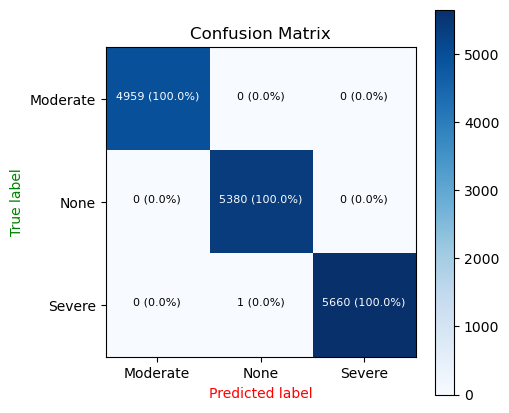

In [59]:
plot_confusion_matrix(
    y_train, train_preds, label_encoder.classes_, 
    fontsize=8, figsize=(5, 5), 
)

From the above confusion matrix we can be able to see that our model is performing well on the train data in classifying loadshedding impact because it is `mis-classifying` only `1` label. The loadsheding imact was predicted as `None` while it was `Severe`. 


> Let's plot the confucion matrix for our test data.

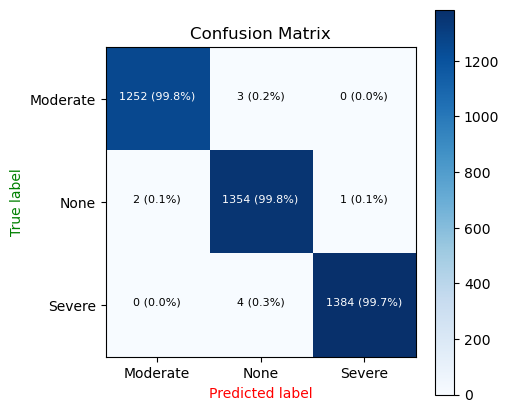

In [60]:
plot_confusion_matrix(
    y_test, test_preds, label_encoder.classes_, 
    fontsize=8, figsize=(5, 5), 
)

From the above confusion matrix we can be able to see that our model is performing well on the test data in classifying loadshedding impact on student performance although it mis classified some labels:

* 2 labels were classified as having `Moderate` impact while they impact to the student is `None` yielding a percantage of `0.1%` misclassified on the label `None`.
* 3 labels were classified as having `None` impact while they impact to the student is `Moderate`  yielding a percantage of `0.2%` misclassified on the label `Moderate`
* 4 labels were classified as having `None` impact while they impact to the student is `Severe`  yielding a percantage of `0.3%` misclassified on the label `Severe`.
* 1 label was classified as having `Severe` impact while they impact to the student is `None`  yielding a percantage of another `0.1%` misclassified on the label `None`.

> In the test dataset there are only `10` labels that was misclassified by the model.


### Precision Score

Precision score measures the proportion of positively predicted labels that are actually correct. Precision is also known as the positive predictive value. Let's check the precision score of our model based on our examples in each set.

In the train set the precision score are as follows:

In [61]:
precision = precision_score(y_train, train_preds, labels=np.array([0, 1, 2], dtype=np.float32), average=None)
precision

array([1.        , 0.99981416, 1.        ])

From the above scores shows us that the model  has the following positive predicted value on each class.

* `0 (Moderate) - ~100%`
* `1 (None) - ~99.99%`
* `2 (Severe)- ~100%`

In the `train` data.


How about in the test data?

In [63]:
precision = precision_score(y_test, test_preds, labels=np.array([0, 1, 2], dtype=np.float32), average=None)
precision

array([0.9984051 , 0.99485672, 0.99927798])

From the above scores shows us that the model  has the following positive predicted value on each class.

* `0 (Moderate) - ~99.84%`
* `1 (None) - ~99.48%`
* `2 (Severe)- ~99.92%`

In the `train` data.


### Accuracy Score
Though this is not a good measure of how our model is performing when unbalanced examples for each label. However in our dataset our examples have labels that are close to balanced and we can use this metric to measure the model performance. The accuracy score can be caluculated as follows:

In [68]:
train_accuracy = accuracy_score(y_train, train_preds)
train_accuracy

0.9999375

Our model was able to achive an accuracy of `~99.99%` on the train examples. Which shows us that our model is accurate in predicting classifying loadshedding impact from the train dataset.

In [69]:
test_accuracy = accuracy_score(y_test, test_preds)
test_accuracy

0.9975

Our model was able to achive an accuracy of `~99.75%` on the test examples. Which shows us that our model is accurate in predicting classifying loadshedding impact from the test dataset.

### Classification Report.

The classification report visualizer displays the `precision`, `recall`, `F1`, and `support` scores for the model. Let's display the classification report for each set.

Let's print the classification report based on the train predictions.

In [70]:
cr = classification_report(y_train, train_preds, output_dict=False)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4959
           1       1.00      1.00      1.00      5380
           2       1.00      1.00      1.00      5661

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000



Let's print the classification report based on the test predictions.

In [72]:
cr = classification_report(y_test, test_preds, output_dict=False)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       0.99      1.00      1.00      1357
           2       1.00      1.00      1.00      1388

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



### Model Inference

In this section of the notebook we are going to make use of our model in making predictions. First let's have a look at the last `10` rows of data that we have in our dataframe.

In [75]:
dataframe.tail(10).reset_index(drop=True)

,Institution,Year of Study,GPA,Loadshedding Frequency,Loadshedding Duration,Loadshedding Impact
0,University of Cape Town,4,0.000000,3,15.049214,Severe
1,Stellenbosch University,1,0.743076,0,23.664177,Severe
2,University of Johannesburg,2,2.422348,4,18.672421,None
3,University of KwaZulu-Natal,1,1.429225,0,18.314634,None
4,University of Pretoria,4,1.349080,0,0.340164,None
5,University of Cape Town,2,2.261930,0,20.553965,None
6,Stellenbosch University,4,1.789417,4,8.499748,None
7,University of Johannesburg,4,3.235504,1,15.075249,Moderate
8,University of KwaZulu-Natal,3,3.691792,2,4.200950,Moderate
9,University of Pretoria,4,2.787871,3,18.108455,Moderate


When predicting the loadsheding impact we are going to do the following:
    
1. use the column transformer to transform our features. The column transformer that we are going to use is the one that we used during creation of the model.
2. call the `predict_impact` method that will returns the prediction in `dictionary` form.
3. the `predict_impact` takes in the transformed features, (x) model and the class names.

> Let's define the predict impact function.

In [121]:
def predict_impact(x, model, classes: list):
    pred = int(model.predict(x).squeeze())
    class_ = classes[pred]
    return{
        'label': pred,
        'impact': class_
    }

Let's get the features of each impact and convert them to a pandas dataframe.

In [141]:
severe = dataframe.tail(10).reset_index(drop=True).loc[0]
moderate = dataframe.tail(10).reset_index(drop=True).loc[8]
none = dataframe.tail(10).reset_index(drop=True).loc[6]

severe = pd.DataFrame([severe[:-1].values], columns=severe[:-1].keys())
moderate = pd.DataFrame([moderate[:-1].values], columns=moderate[:-1].keys())
none = pd.DataFrame([none[:-1].values], columns=none[:-1].keys())

Let's transform our features per each impact.

In [142]:
severe = ct.transform(severe)
moderate = ct.transform(moderate)
none = ct.transform(none)

Let's make prediction on the `Severe` label and see if we will get it right.

In [143]:
predict_impact(severe, model, label_encoder.classes_)

{'label': 2, 'impact': 'Severe'}

Let's make prediction on the `Moderate` label and see if we will get it right.

In [144]:
predict_impact(moderate, model, label_encoder.classes_)

{'label': 0, 'impact': 'Moderate'}

Let's make prediction on the `None` label and see if we will get it right.

In [145]:
predict_impact(none, model, label_encoder.classes_)

{'label': 1, 'impact': 'None'}

### Saving Predictions

Now that we can see that our predictions are perfect. Let's make predictions using our `test` dataframe and save these predictions to a `csv` file called `predicted/loadshedding_impact_predictions.csv`. 


In [158]:
if not os.path.exists('predicted'):
    os.mkdir('predicted')

SAVE_PATH = os.path.join('predicted', 'loadshedding_impact_predictions.csv')

Let's make a column called `'Predicted Impact'` and add our predicted labels to the dataframe.

In [159]:
preds = model.predict(test_features_transformed)
pred_df = test.reset_index(drop=True)
pred_df['Predicted Impact'] = [label_encoder.classes_[i] for i in preds]
pred_df.head(10)

,Institution,Year of Study,GPA,Loadshedding Frequency,Loadshedding Duration,Loadshedding Impact,Predicted Impact
0,University of Cape Town,4,0.882055,1,0.061599,Severe,Severe
1,University of Pretoria,3,1.354489,1,1.178098,None,None
2,University of KwaZulu-Natal,3,0.000000,3,4.639600,Severe,Severe
3,Stellenbosch University,1,0.288900,1,19.397185,Severe,Severe
4,University of Pretoria,3,0.344736,3,8.404023,Severe,Severe
5,University of Cape Town,4,0.497347,6,15.496554,Severe,Severe
6,University of KwaZulu-Natal,3,1.569587,2,0.060002,None,None
7,Stellenbosch University,2,0.511388,1,0.059871,Severe,Severe
8,Stellenbosch University,4,1.380896,0,7.210350,None,None
9,Stellenbosch University,3,3.206990,5,4.876170,Moderate,Moderate


Now we can save the predictions as a `csv` file.

In [160]:
pred_df.to_csv(SAVE_PATH, index=False)
print('Saved!!')

Saved!!


### Refs

1. [`pandas`](https://pandas.pydata.org/)
2. [`matplotlib`](https://matplotlib.org/)
3. [`sklearn`](https://scikit-learn.org/stable/) 
4. [`numpy`](https://numpy.org/) 